I'm using a Fourier Transform to negate the time dimensionality of the data. This should hopefully result in less redundant data for the model.

In [2]:
import numpy as np
epochs = np.load("chb01-03_epochs_np_array.npy")
seizure_epochs = np.load("chb01-03_seizure_epochs_np_array.npy")


In [2]:
transformed = np.fft.fft(epochs)

(89976, 23, 256)


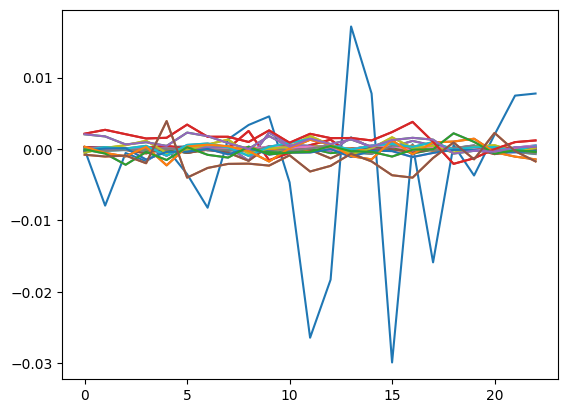

In [8]:
import matplotlib.pyplot as plt
print(transformed.shape)
plt.plot(transformed[0])
plt.show()

(89976, 23, 256)


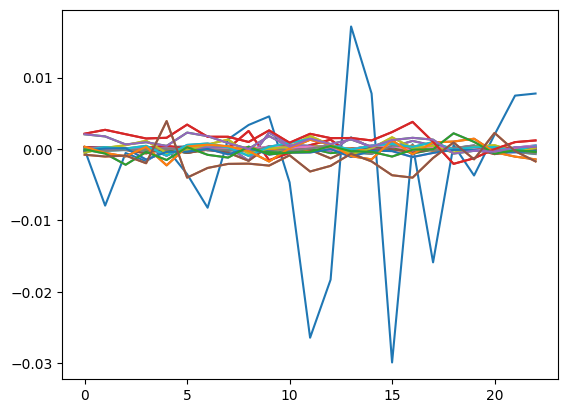

In [22]:
print(transformed.shape)
plt.plot(transformed[0])
plt.show()

After doing some further reading, it seems that FFTs aren't great for epileptic seizure detection. Wavelet transforms seem to be better suited for "sudden and transient" signal changes.

In [3]:
import pywt
print(pywt.wavelist(kind="discrete"))
wavelet_transform = pywt.dwt(epochs, 'db4')

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'haar', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']


(89976, 23, 131)


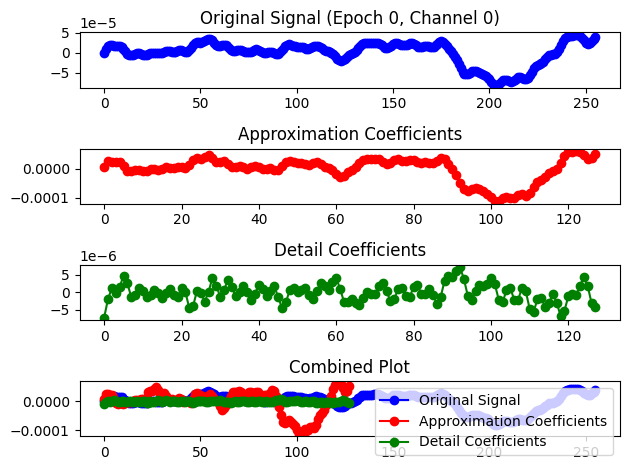

In [4]:
import matplotlib.pyplot as plt
print(wavelet_transform[0].shape)


# The result is a tuple containing approximation coefficients and detail coefficients
approximation_coefficients, detail_coefficients = wavelet_transform
epoch_index = 0
channel_index = 0
selected_signal = epochs[epoch_index][channel_index]
# Perform one level of discrete wavelet transform
coeffs = pywt.dwt(selected_signal, 'db1')

# The result is a tuple containing approximation coefficients and detail coefficients
approximation_coefficients, detail_coefficients = coeffs

# Plot the original signal and its wavelet coefficients
plt.subplot(4, 1, 1)
plt.plot(selected_signal, 'b-o')
plt.title('Original Signal (Epoch {}, Channel {})'.format(epoch_index, channel_index))

plt.subplot(4, 1, 2)
plt.plot(approximation_coefficients, 'r-o')
plt.title('Approximation Coefficients')

plt.subplot(4, 1, 3)
plt.plot(detail_coefficients, 'g-o')
plt.title('Detail Coefficients')

plt.subplot(4, 1, 4)
plt.plot(selected_signal, 'b-o', label='Original Signal')
plt.plot(approximation_coefficients, 'r-o', label='Approximation Coefficients')
plt.plot(detail_coefficients, 'g-o', label='Detail Coefficients')
plt.title('Combined Plot')
plt.legend()

plt.tight_layout()
plt.show()

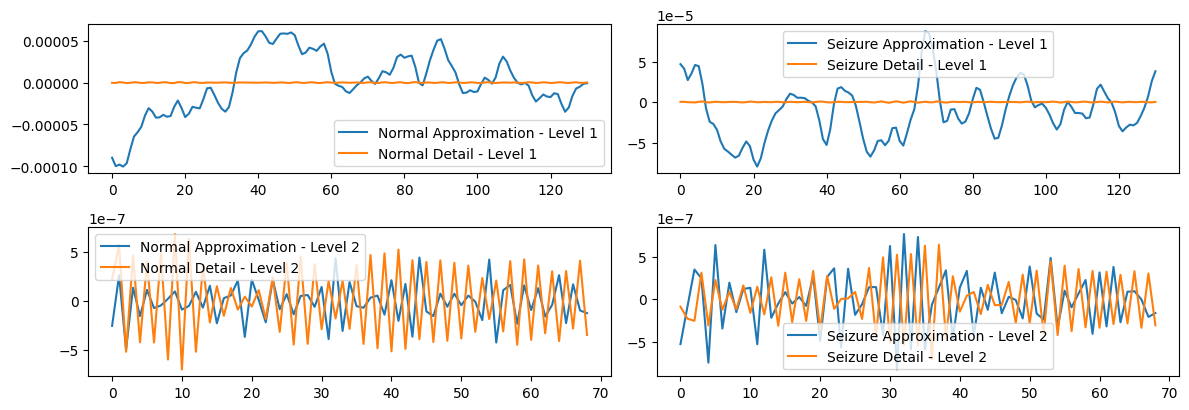

In [123]:
num_levels = 2
epoch = 20
sensor = 6
wavelet = "db4"
# Initialize the signal for the first level
current_signal = epochs[epoch][sensor]
seizure_signal = seizure_epochs[epoch][sensor]

plt.figure(figsize=(12,6))
# Iterate through the desired number of levels
for level in range(num_levels):
    # Perform DWT for the current level
    coeffs = pywt.dwt(current_signal, wavelet)
    coeffs_seizure = pywt.dwt(seizure_signal, wavelet)
    
    # Extract the approximation and detail coefficients
    approximation_coefficients, detail_coefficients = coeffs
    seizure_approx, seizure_detail = coeffs_seizure
    
    # Plot the current level
    plt.subplot(num_levels + 1, 2, 2 * level + 1)
    plt.plot(approximation_coefficients, label=f'Normal Approximation - Level {level + 1}')
    plt.plot(detail_coefficients, label=f'Normal Detail - Level {level + 1}')
    plt.legend()

    # Plot the current level
    plt.subplot(num_levels + 1, 2, 2 * level + 2)
    plt.plot(seizure_approx, label=f'Seizure Approximation - Level {level + 1}')
    plt.plot(seizure_detail, label=f'Seizure Detail - Level {level + 1}')
    plt.legend()
    
    # Prepare for the next level
    current_signal = detail_coefficients
    seizure_signal = seizure_detail

# Plot the original signal
# plt.subplot(num_levels + 1, 1, num_levels + 1)
# plt.plot(epochs[0][0], 'b-', label='Original Signal')
# plt.legend()


normal_transformed = detail_coefficients
seizure_transformed = seizure_detail

plt.tight_layout()
plt.show()

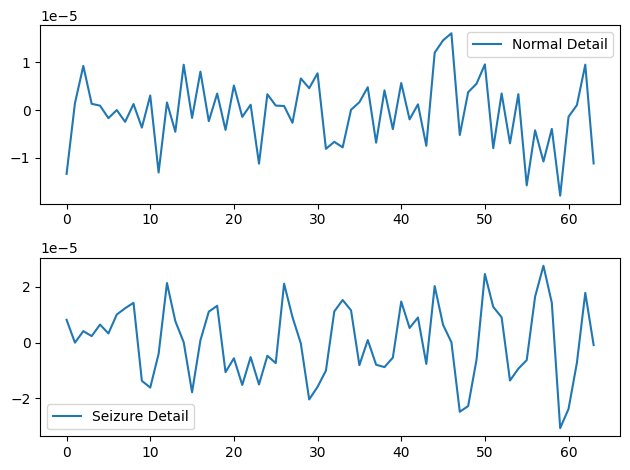

In [6]:
wavelet = "db1"

normal_signal = epochs[0][0]
seizure_signal = seizure_epochs[0][0]

n = pywt.wavedec(normal_signal, wavelet, level=2)
s = pywt.wavedec(seizure_signal, wavelet, level=2)

n_a, n_d, _ = n
s_a, s_d, _ = s

plt.subplot(2,1,1)
# plt.plot(n_a, label="Normal Approximation")
plt.plot(n_d, label="Normal Detail")
plt.legend()

plt.subplot(2,1,2)
# plt.plot(s_a, label="Seizure Approximation")
plt.plot(s_d, label="Seizure Detail")
plt.legend()

plt.tight_layout()
plt.show()


NameError: name 's_d' is not defined

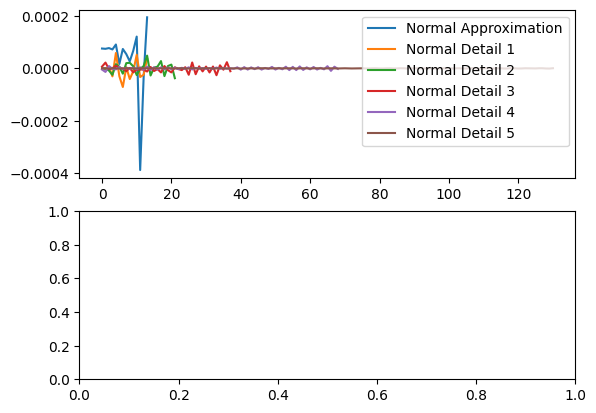

In [5]:
wavelet = "db4"

normal_signal = epochs[0][0]
seizure_signal = seizure_epochs[0][0]

n = pywt.wavedec(normal_signal, wavelet, level=5)
s = pywt.wavedec(seizure_signal, wavelet, level=5)

n_approx, n_coeffs = n[0], n[1:]
s_approx, s_coeffs = s[0], s[1:]

plt.subplot(2,1,1)
plt.plot(n_approx, label="Normal Approximation")
for i, n_d in enumerate(n_coeffs):
    plt.plot(n_d, label=f"Normal Detail {i+1}")
plt.legend()

plt.subplot(2,1,2)
# plt.plot(s_a, label="Seizure Approximation")
plt.plot(s_d, label="Seizure Detail")
plt.legend()

plt.tight_layout()
plt.show()
